<a href="https://colab.research.google.com/github/RounakMishra9905/BCS-Lluminating-Language/blob/main/Week%201/Week1_Rounak_Mishra_detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the required libraries**


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from gensim import models
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **EDA**

1.   Removing Null Values
2.   Removing duplicate rows
3.   Checking for inconsistencies in the data(number of zeroes and ones and any other number that would be a inconsistency)
4.   The graph of sentiment versus lengths of reviews



In [ ]:
data = pd.read_csv("/content/drive/MyDrive/https:  github.com udbhav-44 BCS-Lluminating-Language/movie.csv")

In [ ]:
data.head()


text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

In [ ]:
null_values = data.isnull().sum()
print(null_values)
if null_values.sum()==0:
  print("There are no null entries in any column.")
else:
  data.dropna(axis=1,inplace=True)

text     0
label    0
dtype: int64
There are no null entries in any column.


In [ ]:
duplicateRows = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRows)
#Reference:https://www.projectpro.io/recipes/read-csv-data-from-local-system-and-remove-extra-columns-and-change-date-formats
data.drop_duplicates(inplace=True)

Duplicate Rows except first occurrence based on all columns are :
                                                    text  label
2164   I find it rather useless to comment on this "m...      0
3236   An absolutely atrocious adaptation of the wond...      0
3428   When I first saw this film it was not an impre...      0
3652   Before I watched this tv movie I did not know ...      1
3787   What a clunker!<br /><br />It MUST have been m...      0
...                                                  ...    ...
39229  I Enjoyed Watching This Well Acted Movie Very ...      1
39246  You do realize that you've been watching the E...      0
39508  (Spoilers)<br /><br />Oh sure it's based on Mo...      0
39681  It's been a long time since I last saw a movie...      0
39746  Goodnight, Mister Tom begins in an impossibly ...      0

[277 rows x 2 columns]


In [ ]:
zeros=0
ones=0
others=0
for _ in data['label']:
  if _==0:
    zeros+=1
  elif _==1:
    ones+=1
  else:
    others+=1
print(zeros)
print(ones)
print(others)
if others==0:
  print("So there are no inconsistencies in the data.")
print("The data is balanced as can be seen from the number of zeros and ones.")

19815
19908
0
So there are no inconsistencies in the data.
The data is balanced as can be seen from the number of zeros and ones.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


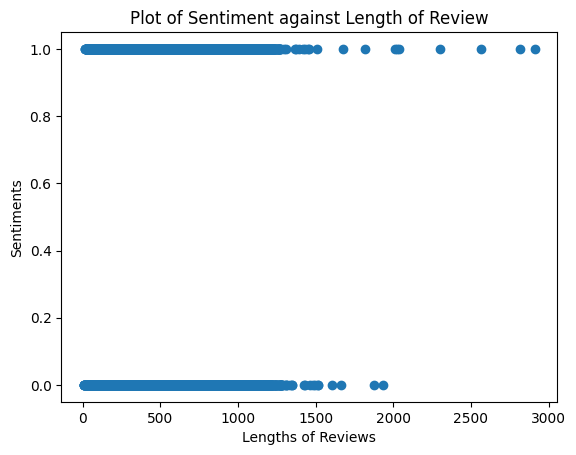

In [ ]:
nltk.download('punkt')
Lengths_of_reviews=[]
sentiments=[]
for _ in data["text"]:
  word_count=len(nltk.word_tokenize(_))
  Lengths_of_reviews.append(word_count)
for _ in data["label"]:
  sentiments.append(_)
plt.scatter(Lengths_of_reviews,sentiments)
plt.xlabel('Lengths of Reviews')
plt.ylabel('Sentiments')
plt.title('Plot of Sentiment against Length of Review')
plt.show()



# **Data Preprocessing**

1.   Removed stopwords,emojis,punctuations that helps to make sentiment analysis easier
2.   Performed Stemming that helps to reduce the amount of data being used,stemming refers to changing all the forms of a particular word to its base form.Like change,changing,changed are all changed to chang.(obviously stemming had to be done after tokenizing all the sentences)
3.   Then,I performed the train test split.



In [ ]:
#From stackoverflow https://stackoverflow.com/a/49146722
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

def remove_unwanted(document):

    # remove user mentions
    document = re.sub("@[A-Za-z0-9_]+"," ", document)
    # remove URLS
    document = re.sub(r'http\S+', ' ', document)
    # remove hashtags
    document = re.sub("#[A-Za-z0-9_]+","", document)
    # remove emoji's
    document = remove_emoji(document)
    # remove punctuation
    document = re.sub("[^0-9A-Za-z ]", "" , document)
    # remove double spaces
    document = document.replace('  ',"")

    return document.strip()

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
def data_pre_processing(text):
    text=remove_emoji(text)
    text=remove_unwanted(text)
    tokens=word_tokenize(text)
    filtered_tokens=[word.lower() for word in tokens if word.lower() not in stop_words]
    processed_text=' '.join(filtered_tokens)
    return processed_text
data['text'] = data['text'].apply(data_pre_processing)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data.head()

text  label
0  grew b 1965 watching loving thunderbirds mates...      0
1  put movie dvd player sat coke chips expectatio...      0
2  people know particular time past like feel nee...      0
3  even though great interest biblical movies bor...      0
4  im die hard dads army fan nothing ever change ...      1

In [ ]:
stemmer=PorterStemmer()
def stemmer1(text):
    tokens=word_tokenize(text)
    filtered_tokens=[stemmer.stem(word) for word in tokens]
    processed_text=' '.join(filtered_tokens)
    return processed_text
data['text'] = data['text'].apply(stemmer1)
data.head()

text  label
0  grew b 1965 watch love thunderbird mate school...      0
1  put movi dvd player sat coke chip expect hope ...      0
2  peopl know particular time past like feel need...      0
3  even though great interest biblic movi bore de...      0
4  im die hard dad armi fan noth ever chang got t...      1

In [ ]:
X=data["text"].tolist()
y=data["label"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=104)

In [ ]:
sentences=X_train
tokenizer=Tokenizer(num_words=2000000)
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index
print(word_index)

{'br': 1, 'movi': 2, 'film': 3, 'one': 4, 'like': 5, 'time': 6, 'good': 7, 'make': 8, 'get': 9, 'see': 10, 'charact': 11, 'watch': 12, 'even': 13, 'stori': 14, 'would': 15, 'realli': 16, 'scene': 17, 'show': 18, 'look': 19, 'well': 20, 'much': 21, 'end': 22, 'peopl': 23, 'also': 24, 'love': 25, 'great': 26, 'go': 27, 'bad': 28, 'think': 29, 'play': 30, 'first': 31, 'dont': 32, 'way': 33, 'act': 34, 'thing': 35, 'could': 36, 'made': 37, 'know': 38, 'say': 39, 'seem': 40, 'mani': 41, 'plot': 42, 'seen': 43, 'work': 44, 'want': 45, 'come': 46, 'actor': 47, 'two': 48, 'never': 49, 'take': 50, 'littl': 51, 'tri': 52, 'best': 53, 'year': 54, 'life': 55, 'ever': 56, 'give': 57, 'man': 58, 'better': 59, 'still': 60, 'find': 61, 'perform': 62, 'feel': 63, 'actual': 64, 'use': 65, 'part': 66, 'someth': 67, 'lot': 68, 'back': 69, 'im': 70, 'interest': 71, 'real': 72, 'director': 73, 'guy': 74, 'didnt': 75, 'doesnt': 76, 'anoth': 77, 'live': 78, 'enjoy': 79, 'though': 80, 'music': 81, 'cast': 82, 

# **Feature Extraction,Using all models and calculating accuracies**

1.   For Feature Extraction,I used all the given methods like word2vec,Count Vectorizer/Bag of words,TF-IDF Vectorizer,One Hot Encoding.All of these basically convert the sentences into lists of vectors that is understandable by the computer.
2.   Then for every kind of feature Extraction,I used BNB,LR,SVM,Random Forests and neural networks for word2vec(NN doesn't give results in others)
3.   Then for each model,I calculated the accuracy,F1 Score,constructed the Confusion Matrix and drew the ROC Curve.



In [ ]:
#Wordtovec model will be the best here as it considers the semantic meaning of words(source-google) and I am obviously applying it separately on the tokenized training set and non tokenized test set in the next cell.
training_reviews=sentences
training_model=Word2Vec(sentences=training_reviews, window=10, min_count=1, workers=4)
training_model.save("word2vec_training_model.bin")
word2Vec_model_training = Word2Vec.load("word2vec_training_model.bin")
def training_embedding(text):
    tokens=word_tokenize(text)
    review_trained = [training_model.wv[word] for word in tokens if word in training_model.wv]
    if review_trained:
        review_embedding = sum(review_trained) / len(review_trained)
    else:
        review_embedding = [0] * word2Vec_model_training.vector_size
    return review_embedding
sentences_1=[training_embedding(sentence) for sentence in sentences]






In [ ]:
testing_reviews=X_test
testing_model=Word2Vec(sentences=testing_reviews, window=10, min_count=1, workers=4)
testing_model.save("word2vec_testing_model.bin")
word2Vec_model_testing = Word2Vec.load("word2vec_testing_model.bin")
def testing_embedding(text):
    tokens=word_tokenize(text)
    review_trained = [testing_model.wv[word] for word in tokens if word in testing_model.wv]
    if review_trained:
        review_embedding = sum(review_trained) / len(review_trained)
    else:
        review_embedding = [0] * word2Vec_model_testing.vector_size
    return review_embedding
X_test_1=[training_embedding(sentence) for sentence in X_test]




In [ ]:
#Logistic Regression:
LR=LogisticRegression(max_iter=10000)#I increased the max iterations as it gave an error like max iteration limit reached
LR.fit(sentences_1, y_train)
y_pred=LR.predict(X_test_1)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
f1=f1_score(y_test,y_pred)
print("F1 Score:",f1)
roc_auc=roc_auc_score(y_test,y_pred)
print("ROC AUC Score:",roc_auc)
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.5570436008458363
F1 Score: 0.6661100569259961
ROC AUC Score: 0.5549293708969499
Confusion Matrix:
[[1144 3789]
 [ 610 4388]]


In [ ]:
#Bernoulli naives Classifier(Source-Geeks for geeks):
bnb=BernoulliNB(binarize=0.0)
model=bnb.fit(sentences_1, y_train)
y_pred1=bnb.predict(X_test_1)
accuracy=accuracy_score(y_test,y_pred1)
print("Accuracy:",accuracy)
f1_1=f1_score(y_test,y_pred1)
print("F1 Score:",f1_1)
roc_auc1=roc_auc_score(y_test,y_pred1)
print("ROC AUC Score:",roc_auc1)
conf_matrix1=confusion_matrix(y_test,y_pred1)
print("Confusion Matrix:")
print(conf_matrix1)



Accuracy: 0.541033128587252
F1 Score: 0.6331294269156471
ROC AUC Score: 0.5394131907780344
Confusion Matrix:
[[1440 3493]
 [1065 3933]]


In [ ]:
#SVM
svm=SVC()
svm.fit(sentences_1, y_train)
y_pred2=svm.predict(X_test_1)
accuracy=accuracy_score(y_test,y_pred2)
print("Accuracy:",accuracy)
f1_2=f1_score(y_test,y_pred2)
print("F1 Score:",f1_2)
roc_auc2=roc_auc_score(y_test,y_pred2)
print("ROC AUC Score:",roc_auc2)
conf_matrix2=confusion_matrix(y_test,y_pred2)
print("Confusion Matrix:")
print(conf_matrix2)

Accuracy: 0.5559359581109656
F1 Score: 0.6663640490240581
ROC AUC Score: 0.5537933397563364
Confusion Matrix:
[[1117 3816]
 [ 594 4404]]


In [ ]:
#Decision Tree Classifier
dt_classifier=DecisionTreeClassifier(random_state=104)
dt_classifier.fit(sentences_1,y_train)
y_pred3=dt_classifier.predict(X_test_1)
accuracy3=accuracy_score(y_test,y_pred3)
print("Accuracy:",accuracy3)
f1_3=f1_score(y_test,y_pred3)
print("F1 Score:",f1_3)
roc_auc3=roc_auc_score(y_test,y_pred2)
print("ROC AUC Score:",roc_auc3)
conf_matrix3=confusion_matrix(y_test,y_pred3)
print("Confusion Matrix:")
print(conf_matrix3)

Accuracy: 0.5531165038767496
F1 Score: 0.6608589332110653
ROC AUC Score: 0.5537933397563364
Confusion Matrix:
[[1169 3764]
 [ 674 4324]]


In [ ]:
#Neural Networks(source-FreeCodeCamp):
NNmodel=Sequential([
    Dense(32,activation='relu',input_shape=(100,)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
])
NNmodel.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
y_train1=y_train.tolist()#[Was getting a value error,ao did this]
NNmodel.fit(sentences_1, y_train1,batch_size=32, epochs=100)



Epoch 1/100
931/931 [==============================] - 3s 2ms/step - loss: 0.6855 - accuracy: 0.5417
Epoch 2/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6818 - accuracy: 0.5488
Epoch 3/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6811 - accuracy: 0.5494
Epoch 4/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6806 - accuracy: 0.5500
Epoch 5/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6802 - accuracy: 0.5507
Epoch 6/100
931/931 [==============================] - 3s 3ms/step - loss: 0.6800 - accuracy: 0.5504
Epoch 7/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6798 - accuracy: 0.5510
Epoch 8/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6796 - accuracy: 0.5518
Epoch 9/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6793 - accuracy: 0.5516
Epoch 10/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6793 - accura

In [ ]:
y_pred4=NNmodel.predict(X_test_1)
y_pred4_binary=np.where(y_pred4 >= 0.5, 1, 0)#[Was getting a value error,so did this]
accuracy4=accuracy_score(y_test,y_pred4_binary)
print("Accuracy:",accuracy4)
f1_4=f1_score(y_test,y_pred4_binary)
print("F1 Score:",f1_4)
roc_auc4=roc_auc_score(y_test,y_pred4_binary)
print("ROC AUC Score:",roc_auc4)
conf_matrix4=confusion_matrix(y_test,y_pred4_binary)
print("Confusion Matrix:")
print(conf_matrix4)

311/311 [==============================] - 1s 1ms/step
Accuracy: 0.5559359581109656
F1 Score: 0.6645877700030423
ROC AUC Score: 0.5538394761918551
Confusion Matrix:
[[1152 3781]
 [ 629 4369]]


In [ ]:
#tf_idf_vectorizer
input = X_train
vectorizer_tf_idf = TfidfVectorizer(ngram_range=(1,2),max_features=600000)
vectorizer_tf_idf.fit_transform(input)

<29792x600000 sparse matrix of type '<class 'numpy.float64'>'
	with 5026286 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_tfidf = vectorizer_tf_idf.transform(X_train)
X_test_tfidf  = vectorizer_tf_idf.transform(X_test)

In [ ]:
def model_Evaluate(model):
    y_pred = model.predict(X_test_tfidf)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [ ]:
#Bernoulli Naive Bayes Classifier
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_tfidf, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test_tfidf)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      4933
           1       0.88      0.86      0.87      4998

    accuracy                           0.87      9931
   macro avg       0.87      0.87      0.87      9931
weighted avg       0.87      0.87      0.87      9931

Confusion Matrix:
 [[4368  565]
 [ 682 4316]]
Accuracy Score: 0.8744335917833048


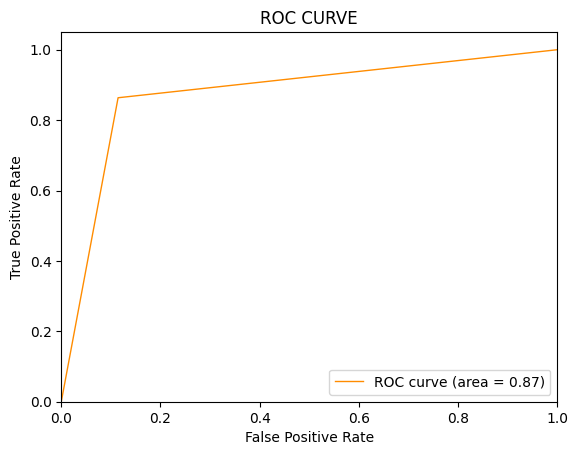

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#SVM
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_tfidf, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_tfidf)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      4933
           1       0.89      0.92      0.90      4998

    accuracy                           0.90      9931
   macro avg       0.90      0.90      0.90      9931
weighted avg       0.90      0.90      0.90      9931

Confusion Matrix:
 [[4364  569]
 [ 419 4579]]
Accuracy Score: 0.9005135434498036


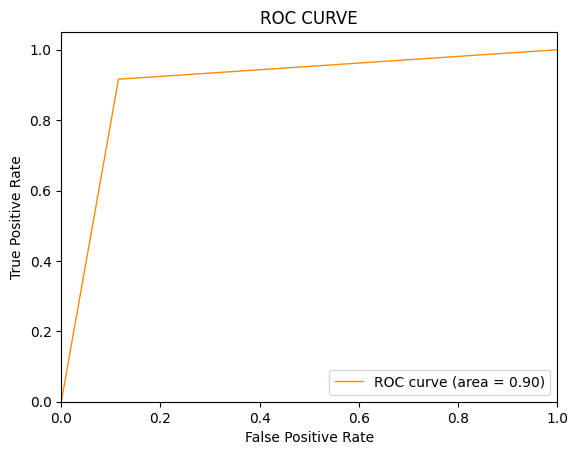

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Logistic Regression
LRmodel = LogisticRegression()
LRmodel.fit(X_train_tfidf, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test_tfidf)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4933
           1       0.87      0.91      0.89      4998

    accuracy                           0.89      9931
   macro avg       0.89      0.89      0.89      9931
weighted avg       0.89      0.89      0.89      9931

Confusion Matrix:
 [[4272  661]
 [ 461 4537]]
Accuracy Score: 0.8870204410431981


In [ ]:
#Random Forest
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train_tfidf, y_train)
model_Evaluate(RFmodel)
y_pred4 = RFmodel.predict(X_test_tfidf)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4933
           1       0.85      0.86      0.86      4998

    accuracy                           0.85      9931
   macro avg       0.85      0.85      0.85      9931
weighted avg       0.85      0.85      0.85      9931

Confusion Matrix:
 [[4184  749]
 [ 693 4305]]
Accuracy Score: 0.8547981069378713


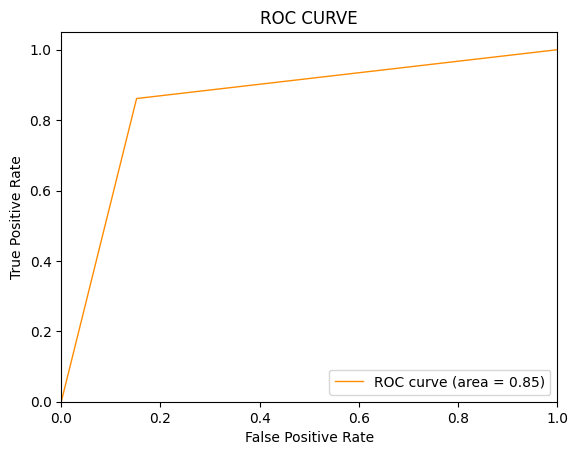

In [ ]:
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr2, tpr2)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''X_train_dense = X_train_tfidf.toarray()#I converted to array due to some errors and now the model keeps crashing due to not enough ram.

input_shape = X_train_dense.shape[1]

NNmodel = Sequential([
    Dense(512, activation='relu', input_shape=(input_shape,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

NNmodel.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

NNmodel.fit(X_train_dense, y_train, batch_size=32, epochs=100)'''


In [ ]:
#Count Vectorizer(or bag of words)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_count = CountVectorizer(ngram_range=(1,2), max_features=600000)
X_train_counts = vectorizer_count.fit_transform(X_train)
X_test_counts = vectorizer_count.fit_transform(X_test)



In [ ]:
def model_Evaluate1(model):
    y_pred = model.predict(X_test_counts)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [ ]:
#Bernoulli Naive Bayes Classifier
BNBmodel1 = BernoulliNB()
BNBmodel1.fit(X_train_counts, y_train)
model_Evaluate1(BNBmodel1)
y_pred5 = BNBmodel1.predict(X_test_counts)

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.46      0.48      4933
           1       0.51      0.56      0.54      4998

    accuracy                           0.51      9931
   macro avg       0.51      0.51      0.51      9931
weighted avg       0.51      0.51      0.51      9931

Confusion Matrix:
 [[2255 2678]
 [2178 2820]]
Accuracy Score: 0.5110260799516665


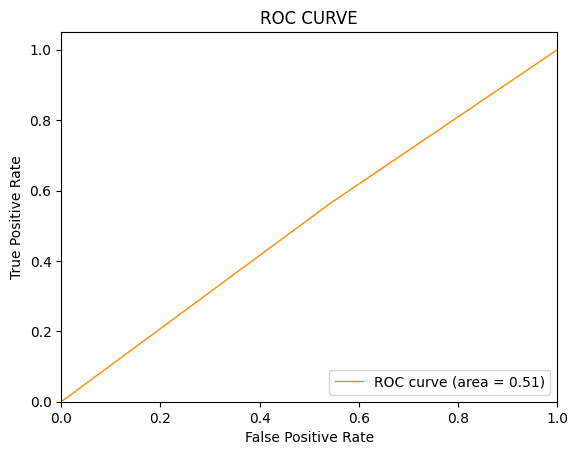

In [ ]:
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred5)
roc_auc = auc(fpr3, tpr3)
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#SVM
from sklearn.svm import LinearSVC
SVCmodel1 = LinearSVC()
SVCmodel1.fit(X_train_counts, y_train)
model_Evaluate1(SVCmodel1)
y_pred6 = SVCmodel1.predict(X_test_counts)

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53      4933
           1       0.52      0.47      0.50      4998

    accuracy                           0.51      9931
   macro avg       0.51      0.51      0.51      9931
weighted avg       0.51      0.51      0.51      9931

Confusion Matrix:
 [[2736 2197]
 [2624 2374]]
Accuracy Score: 0.5145503977444366


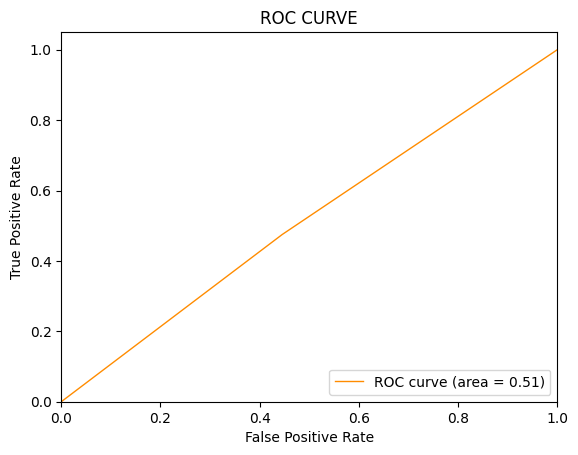

In [ ]:
fpr4, tpr4, thresholds1 = roc_curve(y_test, y_pred6)
roc_auc = auc(fpr4, tpr4)
plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Logistic Regression
LRmodel1 = LogisticRegression()
LRmodel1.fit(X_train_counts, y_train)
model_Evaluate1(LRmodel1)
y_pred7 = LRmodel1.predict(X_test_counts)

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.56      0.53      4933
           1       0.52      0.47      0.49      4998

    accuracy                           0.51      9931
   macro avg       0.51      0.51      0.51      9931
weighted avg       0.51      0.51      0.51      9931

Confusion Matrix:
 [[2745 2188]
 [2653 2345]]
Accuracy Score: 0.5125365018628537


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Random Forest
RFmodel1 = RandomForestClassifier()
RFmodel1.fit(X_train_counts, y_train)
model_Evaluate1(RFmodel1)
y_pred8 = RFmodel1.predict(X_test_counts)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.99      0.66      4933
           1       0.50      0.01      0.02      4998

    accuracy                           0.50      9931
   macro avg       0.50      0.50      0.34      9931
weighted avg       0.50      0.50      0.34      9931

Confusion Matrix:
 [[4880   53]
 [4946   52]]
Accuracy Score: 0.4966267243983486


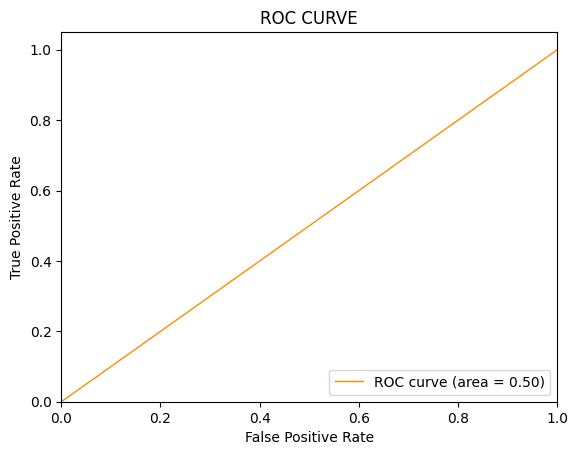

In [ ]:
fpr5, tpr5, thresholds1 = roc_curve(y_test, y_pred8)
roc_auc = auc(fpr5, tpr5)
plt.figure()
plt.plot(fpr5, tpr5, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#One hot encoder
from sklearn.preprocessing import OneHotEncoder
# Converting text data into single strings as onehotencoder doesnt work on strings but rather on words.
X_train_str = [' '.join(doc.split()) for doc in X_train]
X_test_str = [' '.join(doc.split()) for doc in X_test]
encoder = OneHotEncoder(sparse_output=False)
X_train_ohe = encoder.fit_transform([[word] for word in X_train_str])
X_test_ohe = encoder.transform([[word] for word in X_test_str if word in encoder.categories_[0]])


In [ ]:
def model_Evaluate2(model):
    y_pred = model.predict(X_test_ohe)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [ ]:
#Bernoulli Naive Bayes Classifier
BNBmodel2 = BernoulliNB()
BNBmodel2.fit(X_train_ohe, y_train)
model_Evaluate2(BNBmodel2)
y_pred9 = BNBmodel2.predict(X_test_ohe)#I dont think one hot encoder is a suitable model for this.

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
 [[0 1]
 [1 0]]
Accuracy Score: 0.0


In [ ]:
'''fpr6, tpr6, thresholds1 = roc_curve(y_test, y_pred9)
roc_auc = auc(fpr6, tpr6)
plt.figure()
plt.plot(fpr6, tpr6, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()'''#I am not sure how to do this

'fpr6, tpr6, thresholds1 = roc_curve(y_test, y_pred9)\nroc_auc = auc(fpr6, tpr6)\nplt.figure()\nplt.plot(fpr6, tpr6, color=\'darkorange\', lw=1, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'ROC CURVE\')\nplt.legend(loc="lower right")\nplt.show()'

# The combination of TF-IDF Vectorizer and SVM gives the most accuracy.